In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [63]:
train_df = pd.read_csv('train.csv')

In [64]:
test_df = pd.read_csv('test.csv')

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [66]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,...,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
mean,1238.5185,0.4950,1.5223,0.5095,4.3095,0.5215,32.0465,0.5018,140.2490,4.5205,...,645.1080,1251.5155,2124.2130,12.3065,5.7670,11.0110,0.7615,0.5030,0.5070,1.5000
std,439.4182,0.5001,0.8160,0.5000,4.3414,0.4997,18.1457,0.2884,35.3997,2.2878,...,443.7808,432.1994,1084.7320,4.2132,4.3564,5.4640,0.4263,0.5001,0.5001,1.1183
min,501.0000,0.0000,0.5000,0.0000,0.0000,0.0000,2.0000,0.1000,80.0000,1.0000,...,0.0000,500.0000,256.0000,5.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000
25%,851.7500,0.0000,0.7000,0.0000,1.0000,0.0000,16.0000,0.2000,109.0000,3.0000,...,282.7500,874.7500,1207.5000,9.0000,2.0000,6.0000,1.0000,0.0000,0.0000,0.7500
50%,1226.0000,0.0000,1.5000,1.0000,3.0000,1.0000,32.0000,0.5000,141.0000,4.0000,...,564.0000,1247.0000,2146.5000,12.0000,5.0000,11.0000,1.0000,1.0000,1.0000,1.5000
75%,1615.2500,1.0000,2.2000,1.0000,7.0000,1.0000,48.0000,0.8000,170.0000,7.0000,...,947.2500,1633.0000,3064.5000,16.0000,9.0000,16.0000,1.0000,1.0000,1.0000,2.2500
max,1998.0000,1.0000,3.0000,1.0000,19.0000,1.0000,64.0000,1.0000,200.0000,8.0000,...,1960.0000,1998.0000,3998.0000,19.0000,18.0000,20.0000,1.0000,1.0000,1.0000,3.0000


In [67]:
train_df.shape

(2000, 21)

In [68]:
train_df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1520,1883,0,1.6000,0,9,0,24,0.1000,87,1,...,203,915,3563,17,10,3,0,0,0,3
386,1138,0,1.4000,0,12,1,44,0.2000,187,8,...,111,1138,3475,19,3,3,1,0,0,3
1067,1703,1,0.5000,0,5,1,23,0.2000,92,6,...,134,521,793,7,3,17,1,1,0,0
530,1076,1,2.6000,0,3,1,38,0.7000,119,6,...,129,915,891,18,3,9,1,1,0,0
863,1425,0,1.2000,0,9,1,35,0.7000,127,8,...,150,1897,590,13,2,6,1,1,1,0
959,1569,0,0.5000,1,3,0,33,0.2000,147,1,...,519,930,3538,18,1,15,1,0,1,3
477,601,0,2.1000,0,4,0,26,0.3000,101,4,...,509,548,918,9,1,12,0,0,0,0
602,1719,1,2.0000,0,0,0,12,0.3000,122,8,...,240,904,462,6,3,5,0,0,0,0
766,1872,1,0.9000,1,0,0,16,0.5000,80,2,...,286,1484,2295,15,11,16,0,0,1,2
1282,609,1,0.5000,0,4,1,10,0.1000,81,6,...,113,1524,1905,16,3,18,1,1,1,1


In [69]:
for i in train_df.columns:
    print(train_df[i].value_counts())
    print()

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64

blue
0    1010
1     990
Name: count, dtype: int64

clock_speed
0.5000    413
2.8000     85
2.3000     78
2.1000     76
1.6000     76
2.5000     74
0.6000     74
1.4000     70
1.3000     68
1.5000     67
2.0000     67
1.9000     65
0.7000     64
2.9000     62
1.8000     62
1.0000     61
1.7000     60
2.2000     59
0.9000     58
2.4000     58
0.8000     58
1.2000     56
2.6000     55
2.7000     55
1.1000     51
3.0000     28
Name: count, dtype: int64

dual_sim
1    1019
0     981
Name: count, dtype: int64

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

four_g
1    1043
0     957
Name: count, dtype: int64

int_memory
27    47
16    45
14    45
57

In [ ]:
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [71]:
#Небольшой лайфхак, если и в pandas хочется избавиться от научной записи чисел, то выполняйте следующую строку кода
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns='price_range'), train_df['price_range'], test_size=0.2, random_state=42)

# **Масштабирование. Нормализация и стандартизация данных**

В данном датасете все признаки численные. Однако они имеют разные масштабы. Если оставить их такими, 
некоторые модели обучатся плохо (KNN - большие признаки будут давать большое расстояние и влиять на результат в основном будут только они), 
некоторые могут обучиться, но интерпретировать их будет сложно (Линейные модели - без стандартизации большой вес признака не всегда будет означать его важность. И всё таки, данные находящиеся в одном диапазоне, ускоряют сходимость таких моделей). 
А для некоторых моделей масштаб неважен (Деревья решений и их ансамбли строятся на создании решающих правил для признаков)

В общем, лучше проводить нормализацию или стандартизацию

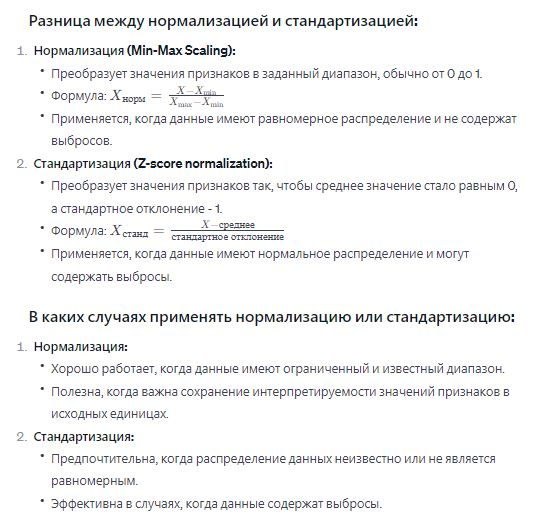

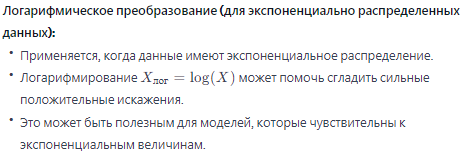

## **Стандартизация**

*Стандартизация наборов данных является общим требованием для многих оценщиков машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные характеристики более или менее не похожи на стандартные нормально распределенные данные: гауссовские с нулевым средним значением и единичной дисперсией.* - **Документация sklearn**

**Шпоргалка распределений** 

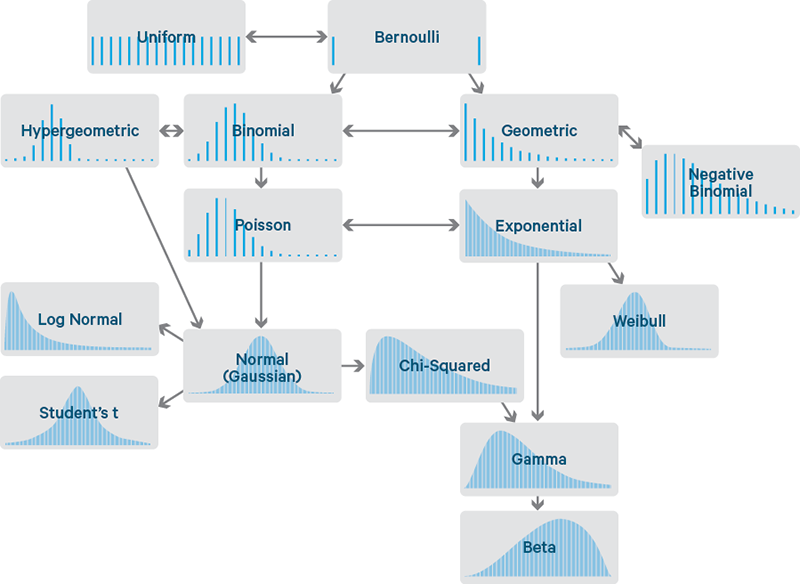 

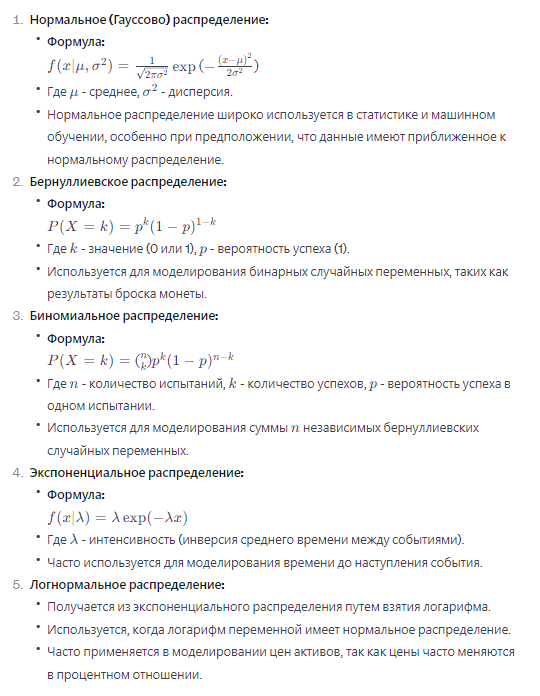

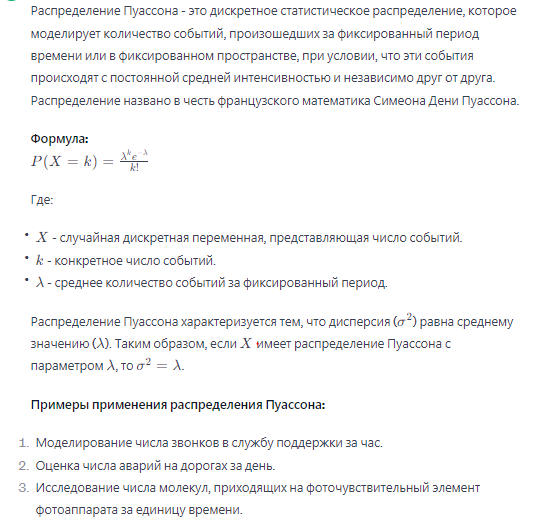

Итак, стандартизация. 

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.


### Реализуем стандартизацию:

In [73]:
means = X_train.mean()
stds = X_train.std()

In [74]:
X_train_std = (X_train - means) / stds
X_train_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.6786,-0.9811,-1.2358,-1.0301,-0.9933,-1.0457,-1.6636,-1.4032,-1.7158,-1.5470,-1.6423,-1.4463,-1.7359,-1.7194,-1.7169,-1.3150,-1.6262,-1.7943,-1.0097,-0.9972
25%,-0.8822,-0.9811,-1.0225,-1.0301,-0.7628,-1.0457,-0.8942,-1.0547,-0.8952,-0.6736,-0.8110,-0.8177,-0.8692,-0.8359,-0.7657,-0.8541,-0.9000,0.5570,-1.0097,-0.9972
50%,-0.0223,-0.9811,-0.0166,0.9701,-0.3019,0.9557,0.0126,-0.0089,0.0104,-0.2369,0.0203,-0.2014,-0.0176,-0.0052,-0.0523,-0.1626,0.0078,0.5570,0.9897,-0.9972
75%,0.8581,1.0186,0.8673,0.9701,0.6199,0.9557,0.8645,1.0368,0.8593,1.0732,0.8515,0.6764,0.8740,0.8567,0.8989,0.7593,0.9156,0.5570,0.9897,1.0022
max,1.7180,1.0186,1.8122,0.9701,3.3853,0.9557,1.7439,1.7339,1.6799,1.5098,1.6828,2.9539,1.7355,1.7413,1.6122,2.8335,1.6419,0.5570,0.9897,1.0022


In [85]:
X_test_std = (X_test - means) / stds #Очень важно заметить, что тестовую выборку мы стандартизируем, используя means и std тренировочной выборки! 
#Если стандартизировать отдельно, это будет неправильно и являтся искажением данных
X_test_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,-0.0260,0.0437,0.0526,-0.0550,-0.0006,-0.0100,-0.0614,-0.0142,-0.0544,-0.0480,0.0319,0.0099,0.0281,0.0374,0.1028,0.0707,0.0491,-0.0191,-0.0200,0.0825
std,0.9860,1.0008,0.9743,1.0011,1.0037,1.0013,0.9860,1.0276,1.0088,0.9956,1.0414,0.9825,1.0087,1.0192,1.0064,1.0193,0.9598,1.0125,1.0009,0.9977
min,-1.6763,-0.9811,-1.2358,-1.0301,-0.9933,-1.0457,-1.6636,-1.4032,-1.7158,-1.5470,-1.6423,-1.4373,-1.7359,-1.7212,-1.7169,-1.3150,-1.6262,-1.7943,-1.0097,-0.9972
25%,-0.8879,-0.9811,-0.8701,-1.0301,-0.7628,-1.0457,-0.8942,-1.0547,-0.9305,-1.1103,-0.9773,-0.8053,-0.8374,-0.8831,-0.7657,-0.8541,-0.7184,0.5570,-1.0097,-0.9972
50%,-0.0608,1.0186,0.1053,-1.0301,-0.3019,0.9557,-0.2622,-0.0089,-0.0745,-0.2369,0.0203,-0.1375,0.0554,0.1114,0.1855,-0.1626,0.0078,0.5570,-1.0097,1.0022
75%,0.8201,1.0186,0.8368,0.9701,0.6199,0.9557,0.7546,1.0368,0.7532,0.6365,0.8931,0.6865,0.9360,0.9495,0.8989,0.7593,0.7795,0.5570,0.9897,1.0022
max,1.7067,1.0186,1.8122,0.9701,3.1549,0.9557,1.7439,1.7339,1.6799,1.5098,1.6828,2.7608,1.7332,1.7367,1.6122,2.8335,1.6419,0.5570,0.9897,1.0022


In [ ]:
numeric_features = X_train_std.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numeric_features), ncols=2, figsize=(6, len(numeric_features) * 3))

for i, feature in enumerate(numeric_features):

    sns.histplot(X_train_std[feature], kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'Standardized {feature}')

    sns.histplot(train_df[feature], kde=True, color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {feature}')

plt.tight_layout()

plt.show()

### Стандартизация в sklearn

In [86]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

In [89]:
X_train_sk_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sk_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [90]:
X_train_sk_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003,1.0003
min,-1.6791,-0.9814,-1.2362,-1.0305,-0.9936,-1.0461,-1.6641,-1.4037,-1.7164,-1.5474,-1.6428,-1.4467,-1.7364,-1.7199,-1.7174,-1.3154,-1.6267,-1.7949,-1.0101,-0.9975
25%,-0.8825,-0.9814,-1.0228,-1.0305,-0.7630,-1.0461,-0.8945,-1.0550,-0.8955,-0.6738,-0.8113,-0.8179,-0.8695,-0.8362,-0.7659,-0.8543,-0.9003,0.5571,-1.0101,-0.9975
50%,-0.0223,-0.9814,-0.0166,0.9704,-0.3020,0.9560,0.0126,-0.0089,0.0104,-0.2370,0.0203,-0.2015,-0.0176,-0.0052,-0.0523,-0.1627,0.0078,0.5571,0.9900,-0.9975
75%,0.8584,1.0189,0.8676,0.9704,0.6201,0.9560,0.8648,1.0371,0.8596,1.0735,0.8518,0.6766,0.8743,0.8570,0.8991,0.7595,0.9159,0.5571,0.9900,1.0025
max,1.7186,1.0189,1.8128,0.9704,3.3864,0.9560,1.7444,1.7345,1.6805,1.5103,1.6833,2.9548,1.7360,1.7419,1.6127,2.8344,1.6424,0.5571,0.9900,1.0025


In [91]:
X_test_sk_std.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,-0.0260,0.0438,0.0526,-0.0550,-0.0006,-0.0100,-0.0614,-0.0142,-0.0545,-0.0481,0.0319,0.0099,0.0281,0.0374,0.1029,0.0707,0.0492,-0.0191,-0.0200,0.0825
std,0.9863,1.0011,0.9746,1.0014,1.0040,1.0017,0.9864,1.0280,1.0091,0.9960,1.0417,0.9828,1.0090,1.0195,1.0067,1.0197,0.9601,1.0128,1.0013,0.9980
min,-1.6769,-0.9814,-1.2362,-1.0305,-0.9936,-1.0461,-1.6641,-1.4037,-1.7164,-1.5474,-1.6428,-1.4377,-1.7364,-1.7217,-1.7174,-1.3154,-1.6267,-1.7949,-1.0101,-0.9975
25%,-0.8881,-0.9814,-0.8703,-1.0305,-0.7630,-1.0461,-0.8945,-1.0550,-0.9308,-1.1106,-0.9776,-0.8056,-0.8376,-0.8834,-0.7659,-0.8543,-0.7186,0.5571,-1.0101,-0.9975
50%,-0.0608,1.0189,0.1053,-1.0305,-0.3020,0.9560,-0.2622,-0.0089,-0.0746,-0.2370,0.0203,-0.1375,0.0554,0.1114,0.1855,-0.1627,0.0078,0.5571,-1.0101,1.0025
75%,0.8204,1.0189,0.8371,0.9704,0.6201,0.9560,0.7548,1.0371,0.7534,0.6367,0.8934,0.6867,0.9363,0.9498,0.8991,0.7595,0.7797,0.5571,0.9900,1.0025
max,1.7072,1.0189,1.8128,0.9704,3.1559,0.9560,1.7444,1.7345,1.6805,1.5103,1.6833,2.7617,1.7337,1.7372,1.6127,2.8344,1.6424,0.5571,0.9900,1.0025


## **Нормализация**

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

### Реализуем самостоятельно

In [92]:
mins = X_train.min()
maxs = X_train.max()

X_train_norm = (X_train - mins)/(maxs - mins)

In [93]:
X_train_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000,1600.0000
mean,0.4942,0.4906,0.4055,0.5150,0.2268,0.5225,0.4882,0.4473,0.5053,0.5061,0.4939,0.3287,0.5001,0.4968,0.5157,0.3170,0.4976,0.7631,0.5050,0.4988
std,0.2944,0.5001,0.3281,0.4999,0.2284,0.4996,0.2935,0.3188,0.2945,0.3271,0.3007,0.2273,0.2881,0.2890,0.3004,0.2410,0.3060,0.4253,0.5001,0.5002
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2345,0.0000,0.0700,0.0000,0.0526,0.0000,0.2258,0.1111,0.2417,0.2857,0.2500,0.1429,0.2497,0.2553,0.2857,0.1111,0.2222,1.0000,0.0000,0.0000
50%,0.4876,0.0000,0.4000,1.0000,0.1579,1.0000,0.4919,0.4444,0.5083,0.4286,0.5000,0.2829,0.4950,0.4953,0.5000,0.2778,0.5000,1.0000,1.0000,0.0000
75%,0.7468,1.0000,0.6900,1.0000,0.3684,1.0000,0.7419,0.7778,0.7583,0.8571,0.7500,0.4824,0.7518,0.7444,0.7857,0.5000,0.7778,1.0000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [94]:
X_test_norm = (X_test - mins)/(maxs-mins) #Опять-таки важно заметить, мы приводим данные тестовой выборки к масштабу относительно тренировочной (mins и maxs - с тренировочной выборки)

### Нормализация в sklearn